In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import pandas as pd
import seaborn as sns
import pickle
import Ressources.TransformHelper as TransformHelper

In [2]:
def save_to_disk(data, filepath):
    with open(filepath, 'wb') as file:
        pickle.dump(data, file)
def load_from_disk(filepath):
    with open(filepath, 'rb') as file:
        data = pickle.load(file)
        return data

# Generate Perspective Transform Matrix

In [3]:
# load images
white_bg_img = cv2.imread("./ressources/map_white.png")
ref_points_img = cv2.imread("./ressources/map_references.png")
ref_points_img = cv2.cvtColor(ref_points_img, cv2.COLOR_BGR2RGB)

White Background shape: (4096, 4096, 3)
Ref points resized img shape: (4096, 4096, 3)


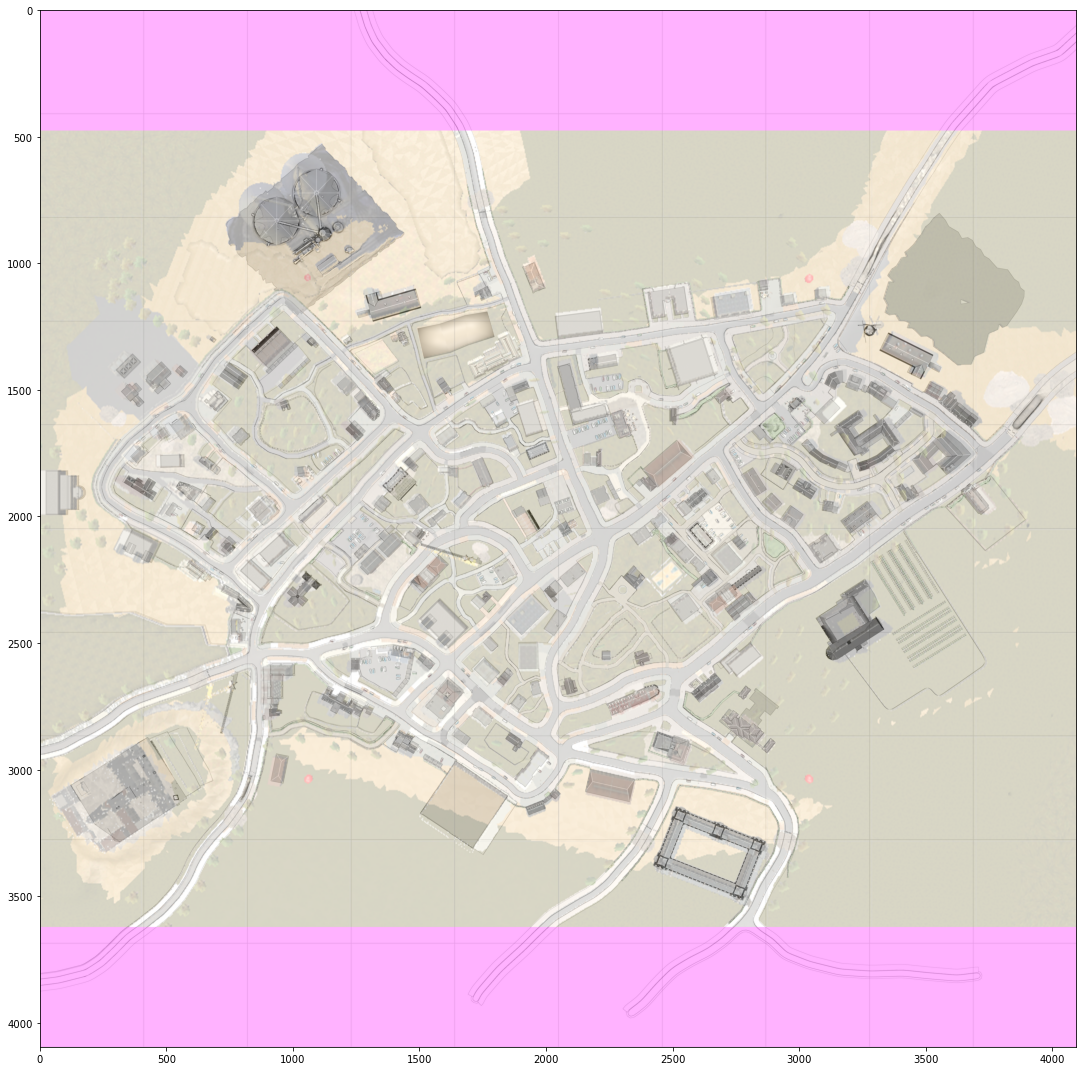

In [4]:
# check sizes of images
print("White Background shape: " + str(np.shape(white_bg_img)))
print("Ref points resized img shape: " + str(np.shape(ref_points_img)))

# check overlay image
overlaied_img = cv2.addWeighted(white_bg_img,0.7,ref_points_img,0.3,0)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(overlaied_img)
plt.tight_layout()


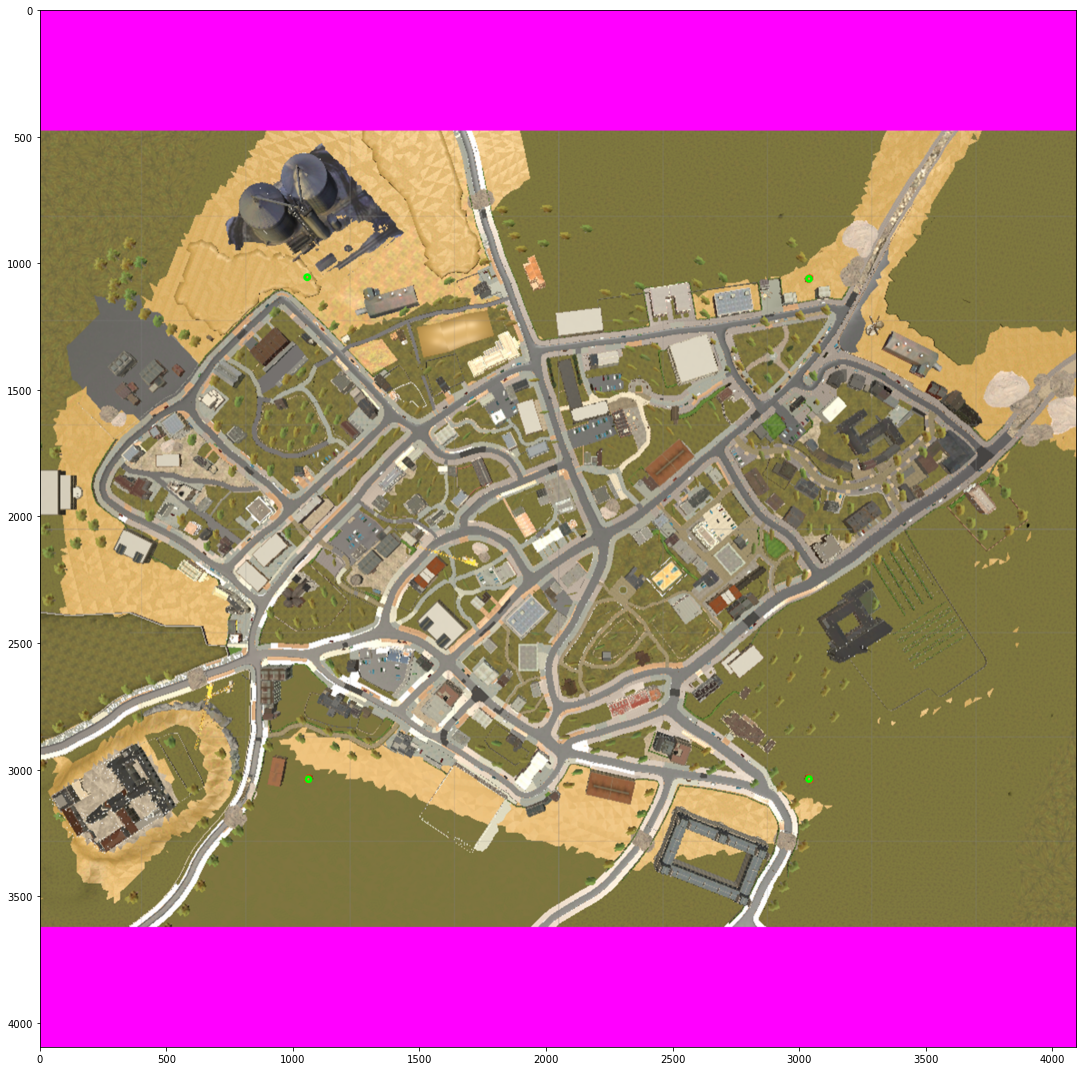

In [5]:
# find corresponding points in source and target space
ref_points_added = ref_points_img.copy()
cv2.circle(ref_points_added, (1055,1055), 10, (0,300,0), 10) # top left
cv2.circle(ref_points_added, (3037,1061), 10, (0,300,0), 10) # top right
cv2.circle(ref_points_added, (1060,3038), 10, (0,300,0), 10) # bottom left
cv2.circle(ref_points_added, (3037,3037), 10, (0,300,0), 10) # bottom right

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(ref_points_added)
plt.tight_layout()

In [6]:
# compute transform matrix
input_pts = np.float32([[240,-240], [-240,-240], [-240,240],[240,240]]) # bottom right, bottom left, top left, top right
target_pts = np.float32([[3037,3037], [1060,3038], [1055,1055], [3037,1061]]) # bottom right, bottom left, top left, top right
transform_matrix = cv2.getPerspectiveTransform(input_pts,target_pts)

# save to disk
transform_infos = {}
transform_infos["perspective_transform_matrix"] = transform_matrix
transform_infos["image_size"] = white_bg_img.shape[0:2]
transform_infos["input_points"] = input_pts
transform_infos["target_points"] = target_pts
save_to_disk(transform_infos,"./Ressources/map_image_transform_infos.pickle")

# Load measurement data - Exploration

In [7]:
# Read example file 
example_df = pd.read_csv("./Results/1023_CompleteExploration_Hitpoints.csv")
#example_df[:10]

In [8]:
# Apply pixel transformation for collider centers & hit points  
example_df = TransformHelper.apply_perspective_transform_matrix(transform_matrix,img_size=(4096,4096),dataframe=example_df,df_x_name="hitObjectColliderBoundsCenter.x",df_y_name="hitObjectColliderBoundsCenter.z",transform_x_name="transformed_collidercenter_x",transform_y_name="transformed_collidercenter_y")
example_df = TransformHelper.apply_perspective_transform_matrix(transform_matrix,img_size=(4096,4096),dataframe=example_df,df_x_name="hitPointOnObject.x",df_y_name="hitPointOnObject.z",transform_x_name="transformed_hitpoint_x",transform_y_name="transformed_hitpoint_y")

example_df[:10]

Calculating Perspective Transform...


100%|██████████| 377285/377285 [00:49<00:00, 7674.52it/s] 


Calculating Perspective Transform...


100%|██████████| 377285/377285 [00:50<00:00, 7527.44it/s] 


Unnamed: 0  timeStampDataPointStart  timeStampDataPointEnd  \
0           0             1.619691e+09           1.619691e+09   
1           1             1.619691e+09           1.619691e+09   
2           0             1.619691e+09           1.619691e+09   
3           1             1.619691e+09           1.619691e+09   
4           0             1.619691e+09           1.619691e+09   
5           1             1.619691e+09           1.619691e+09   
6           0             1.619691e+09           1.619691e+09   
7           0             1.619691e+09           1.619691e+09   
8           0             1.619691e+09           1.619691e+09   
9           1             1.619691e+09           1.619691e+09   

   hitObjectColliderName  ordinalOfHit  hitPointOnObject.x  \
0         pavement_O.002             1          -64.191063   
1          terrain_S.001             2          -65.567734   
2         pavement_O.002             1          -64.191063   
3          terrain_S.001             2          -65.567734   
4         pavement_O.002             1          -64.027878   
5  road_base_network.004             2          -65.057053   
6          terrain_S.001             1          -65.711441   
7          terrain_S.001             1          -66.227020   
8         pavement_O.002             1          -63.692066   
9  road_base_network.004             2          -64.704819   

   hitPointOnObject.y  hitPointOnObject.z  hitObjectColliderBoundsCenter.x  \
0            1.429070           71.214470                      -165.163147   
1            1.163447           81.047607                       -60.390293   
2            1.429070           71.214470                      -165.163147   
3            1.163447           81.047607                       -60.390293   
4            1.426832           70.591492                      -165.163147   
5            1.221172           78.057304                        39.257874   
6            1.185995           83.164772                       -60.390293   
7            1.206157           87.327980                       -60.390293   
8            1.419669           68.122917                      -165.163147   
9            1.200827           75.465088                        39.257874   

   hitObjectColliderBoundsCenter.y  hitObjectColliderBoundsCenter.z  \
0                         1.451688                       -15.555870   
1                         1.153675                       100.804741   
2                         1.451688                       -15.555870   
3                         1.153675                       100.804741   
4                         1.451688                       -15.555870   
5                        -4.408301                        51.768860   
6                         1.153675                       100.804741   
7                         1.153675                       100.804741   
8                         1.451688                       -15.555870   
9                        -4.408301                        51.768860   

   transformed_collidercenter_x  transformed_collidercenter_y  \
0                   1367.184847                   1983.633874   
1                   1799.187626                   2463.431630   
2                   1367.184847                   1983.633874   
3                   1799.187626                   2463.431630   
4                   1367.184847                   1983.633874   
5                   2210.625643                   2260.284238   
6                   1799.187626                   2463.431630   
7                   1799.187626                   2463.431630   
8                   1367.184847                   1983.633874   
9                   2210.625643                   2260.284238   

   transformed_hitpoint_x  transformed_hitpoint_y  
0             1783.685774             2341.266386  
1             1777.935818             2381.879862  
2             1783.685774             2341.266386  
3             1777.935818             2

<AxesSubplot:xlabel='transformed_hitpoint_x', ylabel='Count'>

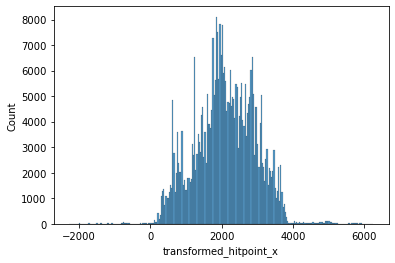

In [9]:

sns.histplot(example_df["transformed_hitpoint_x"])

In [10]:
only_first_ordinal = example_df.loc[example_df["ordinalOfHit"] == 1]
only_first_ordinal[:10]

Unnamed: 0  timeStampDataPointStart  timeStampDataPointEnd  \
0            0             1.619691e+09           1.619691e+09   
2            0             1.619691e+09           1.619691e+09   
4            0             1.619691e+09           1.619691e+09   
6            0             1.619691e+09           1.619691e+09   
7            0             1.619691e+09           1.619691e+09   
8            0             1.619691e+09           1.619691e+09   
10           0             1.619691e+09           1.619691e+09   
12           0             1.619691e+09           1.619691e+09   
14           0             1.619691e+09           1.619691e+09   
16           0             1.619691e+09           1.619691e+09   

   hitObjectColliderName  ordinalOfHit  hitPointOnObject.x  \
0         pavement_O.002             1          -64.191063   
2         pavement_O.002             1          -64.191063   
4         pavement_O.002             1          -64.027878   
6          terrain_S.001             1          -65.711441   
7          terrain_S.001             1          -66.227020   
8         pavement_O.002             1          -63.692066   
10        pavement_O.002             1          -63.761074   
12        pavement_O.002             1          -63.761074   
14          Building_160             1          -72.201660   
16          Building_160             1          -72.201660   

    hitPointOnObject.y  hitPointOnObject.z  hitObjectColliderBoundsCenter.x  \
0             1.429070           71.214470                      -165.163147   
2             1.429070           71.214470                      -165.163147   
4             1.426832           70.591492                      -165.163147   
6             1.185995           83.164772                       -60.390293   
7             1.206157           87.327980                       -60.390293   
8             1.419669           68.122917                      -165.163147   
10            1.422320           69.136017                      -165.163147   
12            1.422320           69.136017                      -165.163147   
14            2.897408          116.358757                       -68.428040   
16            2.897408          116.358757                       -68.428040   

    hitObjectColliderBoundsCenter.y  hitObjectColliderBoundsCenter.z  \
0                          1.451688                       -15.555870   
2                          1.451688                       -15.555870   
4                          1.451688                       -15.555870   
6                          1.153675                       100.804741   
7                          1.153675                       100.804741   
8                          1.451688                       -15.555870   
10                         1.451688                       -15.555870   
12                         1.451688                       -15.555870   
14                         4.519094                       122.944267   
16                         4.519094                       122.944267   

    transformed_collidercenter_x  transformed_collidercenter_y  \
0                    1367.184847                   1983.633874   
2                    1367.184847                   1983.633874   
4                    1367.184847                   1983.633874   
6                    1799.187626                   2463.431630   
7                    1799.187626                   2463.431630   
8                    1367.184847                   1983.633874   
10                   1367.184847                   1983.633874   
12                   1367.184847                   1983.633874   
14                   1765.843387                   2554.953670   
16                   1765.843387                   2554.953670   

    transformed_hitpoint_x  transformed_hitpoint_y  
0              1783.685774             2341.266386  
2              1783.685774             2341.266386  
4              1784.363730             2338.6

# Plotting

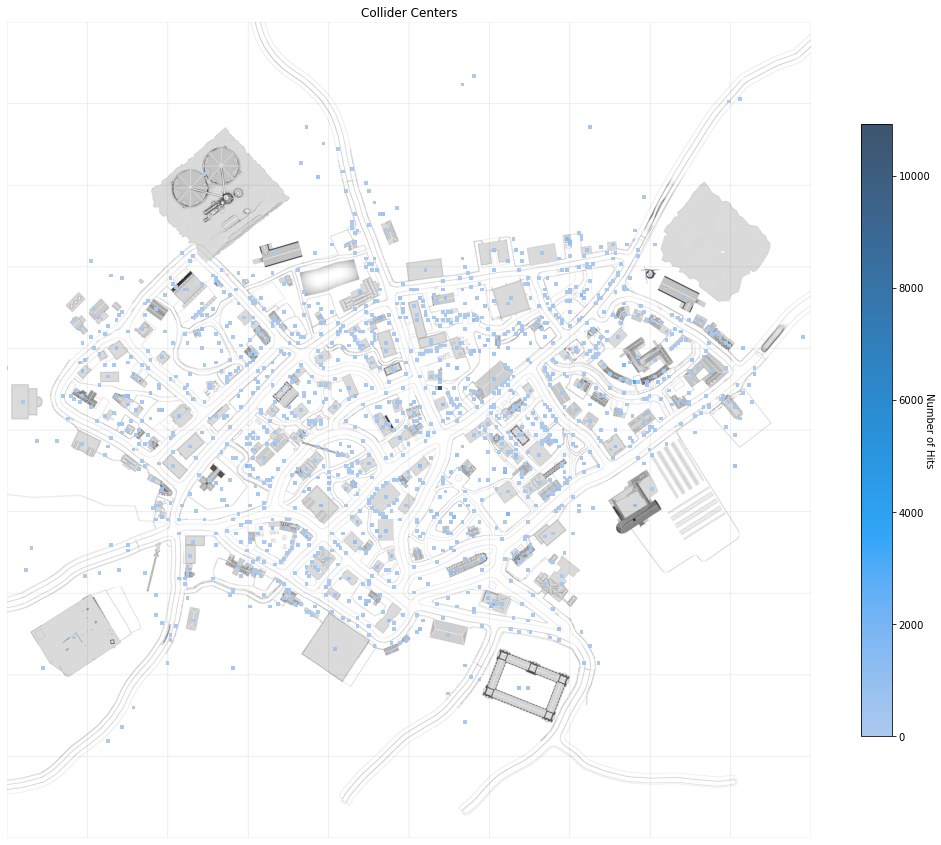

In [11]:
# Hit collider centers

fig, ax = plt.subplots(figsize=(18, 15))

map_bins = 400
histplot = sns.histplot(only_first_ordinal,x="transformed_collidercenter_x",y="transformed_collidercenter_y",bins=map_bins,discrete=(False,False),log_scale=(False,False), cbar=True, cbar_kws={"shrink":0.75}, zorder=2, ax=ax) #alpha = 1,
ax.collections[0].colorbar.set_label("Number of Hits",rotation=270) # fontsize, labelpad

ax.set_frame_on(False)
plt.xlim(0, 4096)
plt.ylim(0, 4096)
plt.title("Collider Centers")
plt.axis('off')
#plt.show()

# add background map 
histplot.imshow(white_bg_img,
         aspect=ax.get_aspect(),
         extent= ax.get_xlim() + ax.get_ylim(),
         zorder=1)

plt.show()



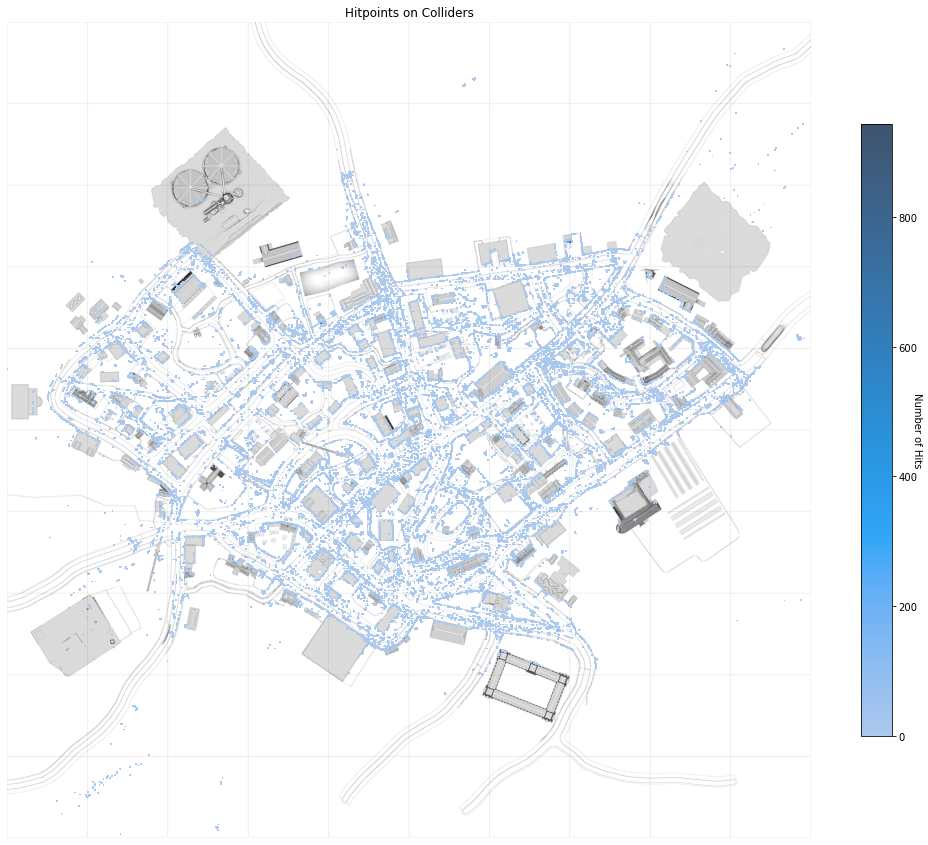

In [12]:
# Hit points on colliders

fig, ax = plt.subplots(figsize=(18, 15))

map_bins = 2048
histplot = sns.histplot(only_first_ordinal,x="transformed_hitpoint_x",y="transformed_hitpoint_y",bins=map_bins,discrete=(False,False),log_scale=(False,False), cbar=True, cbar_kws=dict(shrink=0.75), alpha = 1, zorder=2, ax=ax)
ax.collections[0].colorbar.set_label("Number of Hits",rotation=270) # fontsize, labelpad


ax.set_frame_on(False)
plt.xlim(0, 4096)
plt.ylim(0, 4096)
plt.title("Hitpoints on Colliders")
plt.axis('off')


# add background map 
histplot.imshow(white_bg_img,
         aspect=ax.get_aspect(),
         extent= ax.get_xlim() + ax.get_ylim(),
         zorder=1)

plt.show() # add



### House hits

In [13]:
# example_df 
#"hitPointOnObject.x",df_y_name="hitPointOnObject.z",transform_x_name="transformed_hitpoint_x",transform_y_name="transformed_hitpoint_y"

# load house list 
building_names = load_from_disk("./Ressources/building_names.pickle")

only_first_ordinal[:1]



Unnamed: 0  timeStampDataPointStart  timeStampDataPointEnd  \
0           0             1.619691e+09           1.619691e+09   

  hitObjectColliderName  ordinalOfHit  hitPointOnObject.x  hitPointOnObject.y  \
0        pavement_O.002             1          -64.191063             1.42907   

   hitPointOnObject.z  hitObjectColliderBoundsCenter.x  \
0            71.21447                      -165.163147   

   hitObjectColliderBoundsCenter.y  hitObjectColliderBoundsCenter.z  \
0                         1.451688                        -15.55587   

   transformed_collidercenter_x  transformed_collidercenter_y  \
0                   1367.184847                   1983.633874   

   transformed_hitpoint_x  transformed_hitpoint_y  
0             1783.685774             2341.266386

In [14]:
# find number of hits on houses; groupby building name and collider center, get rid of non-house colliders
sorted_by_collider = only_first_ordinal.groupby(["hitObjectColliderName","hitObjectColliderBoundsCenter.x","hitObjectColliderBoundsCenter.y","hitObjectColliderBoundsCenter.z"]).count()
sorted_by_collider.reset_index(inplace=True)
sorted_by_collider = sorted_by_collider[sorted_by_collider["hitObjectColliderName"].isin(building_names)]
sorted_by_collider.reset_index(inplace=True)
sorted_by_collider.to_csv("./test.csv")
print("Houses with multiple different colliders:")
building_cnt = sorted_by_collider.groupby("hitObjectColliderName").count()
print(building_cnt.loc[building_cnt["hitObjectColliderBoundsCenter.x"] != 1]["hitObjectColliderBoundsCenter.x"])
print()

# apply perspective transformation to collider positions and rename
sorted_by_collider.drop(columns=["transformed_collidercenter_x","transformed_collidercenter_y","transformed_hitpoint_x","transformed_hitpoint_y","timeStampDataPointStart","timeStampDataPointEnd","ordinalOfHit","hitPointOnObject.y","hitPointOnObject.z"],inplace=True)
sorted_by_collider = sorted_by_collider.loc[:, ~sorted_by_collider.columns.str.contains('^Unnamed')]
sorted_by_collider = sorted_by_collider.rename(columns={"hitPointOnObject.x":"hit_points"})
sorted_by_collider = TransformHelper.apply_perspective_transform_matrix(transform_matrix,img_size=(4096,4096),dataframe=sorted_by_collider,df_x_name="hitObjectColliderBoundsCenter.x",df_y_name="hitObjectColliderBoundsCenter.z",transform_x_name="transformed_collidercenter_x",transform_y_name="transformed_collidercenter_y")

# sort by number of hits
sorted_by_collider.sort_values("hit_points",ascending=False,inplace=True)
sorted_by_collider


Houses with multiple different colliders:
hitObjectColliderName
Building_115    2
Building_174    2
Building_183    2
Building_192    2
Building_193    2
Building_205    2
Garage_185      5
Garage_224      3
Garage_235      7
Garage_46       2
Garage_86       4
Garage_98       4
Name: hitObjectColliderBoundsCenter.x, dtype: int64

Calculating Perspective Transform...


100%|██████████| 267/267 [00:00<00:00, 4738.58it/s]


index hitObjectColliderName  hitObjectColliderBoundsCenter.x  \
239   1289       TaskBuilding_34                       -36.325558   
223   1273        TaskBuilding_2                       197.372269   
250   1300       TaskBuilding_44                      -125.418945   
214   1264        TaskBuilding_1                       255.196808   
45     226          Building_145                        13.617243   
..     ...                   ...                              ...   
83     264          Building_183                      -182.037659   
196    928            Garage_235                      -144.320328   
94     275          Building_193                      -405.550934   
197    929            Garage_235                      -142.503006   
177    358           Building_95                       164.476242   

     hitObjectColliderBoundsCenter.y  hitObjectColliderBoundsCenter.z  \
239                         7.075362                       136.050385   
223                        -0.791097                       234.411163   
250                         5.564157                      -129.803604   
214                         4.129490                       -19.178940   
45                          4.364902                       -44.695030   
..                               ...                              ...   
83                         11.397713                       117.260612   
196                         0.293124                      -137.679565   
94                          3.790440                       122.972923   
197                         0.293124                      -128.057709   
177                         4.502962                       125.316757   

     hit_points  transformed_collidercenter_x  transformed_collidercenter_y  
239        1552                   1898.341573                   2608.803715  
223        1374                   2861.554685                   3012.459198  
250        1284                   1532.328936                   1512.219745  
214        1086                   3099.436622                   1966.741610  
45         1027                   2105.369757                   1862.671507  
..          ...                           ...                           ...  
83            2                   1296.206884                   2532.469877  
196           2                   1454.344720                   1479.774583  
94            1                    369.797242                   2558.093411  
197           1                   1461.769999                   1519.438940  
177           1                   2726.265497                   2562.660202  

[267 rows x 8 columns]

In [15]:
# todo 
def generate_rounded_ranges(start,stop,number,round_to):
    gen_range = np.linspace(start,stop,number)
    gen_range = [e // round_to * round_to for e in list(gen_range)]
    return (np.array(gen_range))

print(generate_rounded_ranges(1,1551,10,10))

[   0.  170.  340.  510.  680.  860. 1030. 1200. 1370. 1550.]


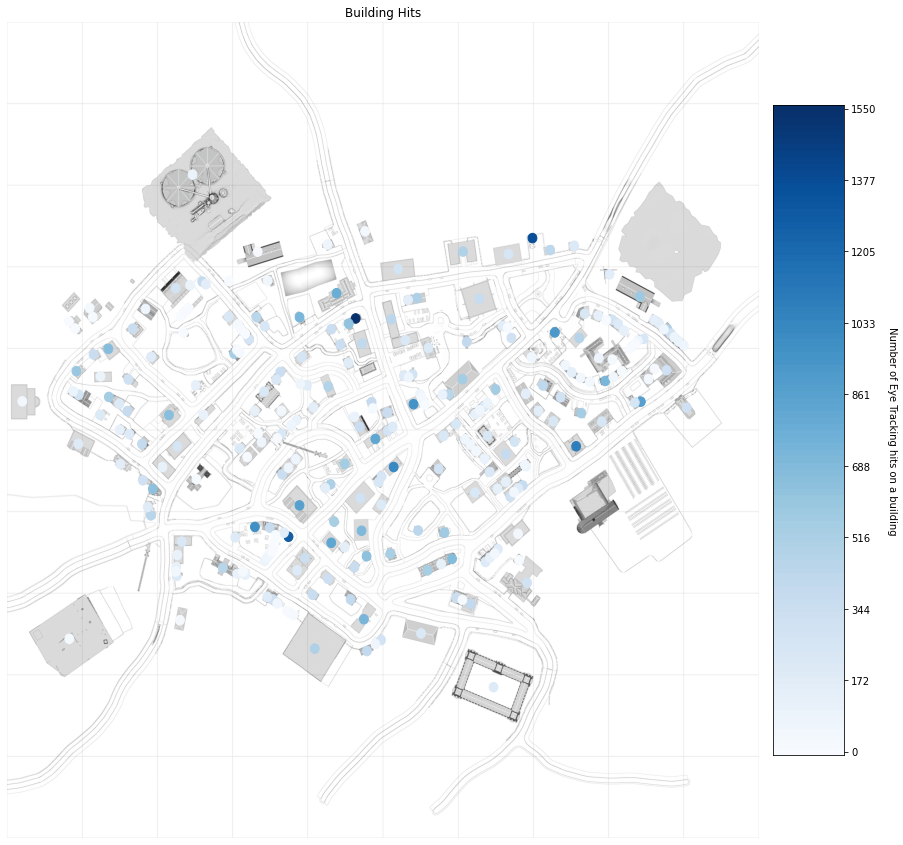

In [16]:
# all buildings

# plot
fig = plt.figure(figsize=(15,15))
ax = plt.subplot2grid((10, 10), (0, 0), colspan=9,rowspan=10)
plt.title("Building Hits")
plt.xlim(0, 4096)
plt.ylim(0, 4096)
ax.set_frame_on(False)
plt.axis('off')
plt.imshow(white_bg_img,aspect=ax.get_aspect(),
         extent= ax.get_xlim() + ax.get_ylim(),
         zorder=1)

# colormap 
cmap = plt.cm.get_cmap('Blues')

# add circles to map 
min_hits = min(sorted_by_collider["hit_points"])
max_hits = max(sorted_by_collider["hit_points"])
circle_size = 24
circles = [] 
for idx, row in sorted_by_collider.reset_index().iterrows():  
    circles.append(plt.Circle((row["transformed_collidercenter_x"],row["transformed_collidercenter_y"]),circle_size,color = cmap((row["hit_points"] - min_hits) / (max_hits - min_hits)),zorder=2))
    ax.add_artist(circles[idx])  


# color bar on the side 
a=np.outer(np.arange(0,1,0.01),np.ones(3))
ax2 = plt.subplot2grid((10, 10), (1, 9),rowspan=8)
plt.imshow(a,aspect='auto',cmap='Blues',origin="lower")
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks(np.linspace(0,99,10))
ax2.get_yaxis().set_ticklabels(np.linspace(min_hits // 10 * 10,max_hits // 10 * 10,10,dtype=int))
ax2.yaxis.tick_right()
ax2.set_ylabel("Number of Eye Tracking hits on a building",rotation=270,labelpad = 20) # fontsize
ax2.yaxis.set_label_position("right")
plt.show()

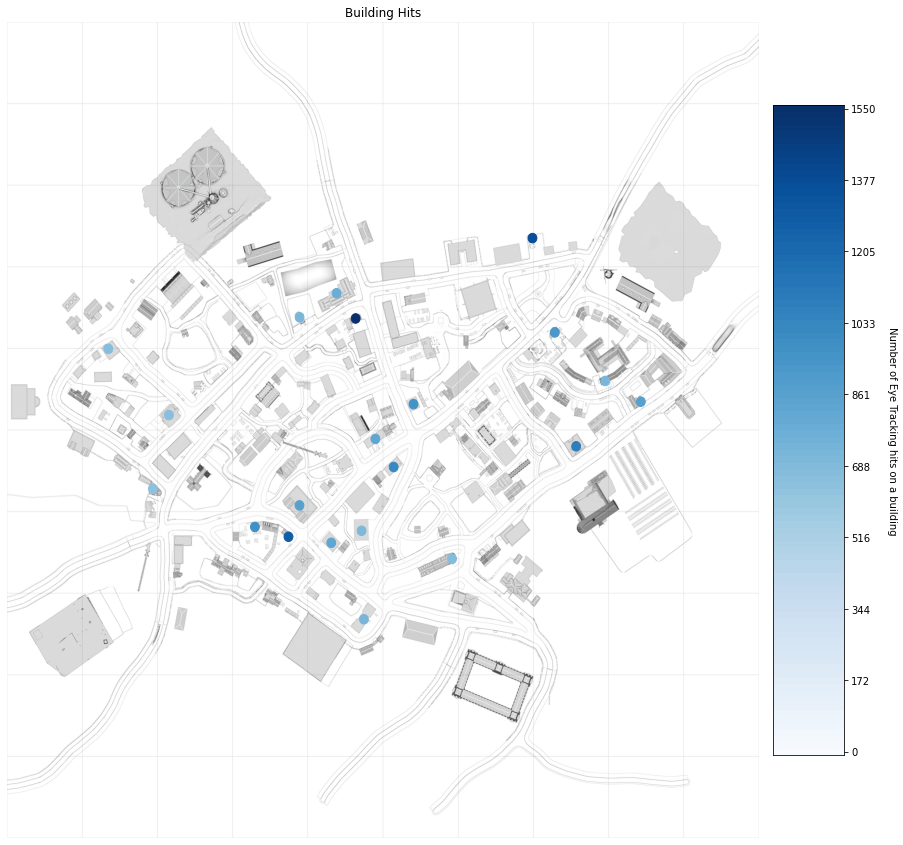

In [17]:
# only top 20 buildings

# plot
fig = plt.figure(figsize=(15,15))
ax = plt.subplot2grid((10, 10), (0, 0), colspan=9,rowspan=10)
plt.title("Building Hits", fontsize = 20)
plt.xlim(0, 4096)
plt.ylim(0, 4096)
ax.set_frame_on(False)
plt.axis('off')
plt.axis('off')
plt.imshow(white_bg_img,aspect=ax.get_aspect(),
         extent= ax.get_xlim() + ax.get_ylim(),
         zorder=1)

# colormap 
cmap = plt.cm.get_cmap('Blues')

# add circles to map 
min_hits = min(sorted_by_collider["hit_points"])
max_hits = max(sorted_by_collider["hit_points"])
circle_size = 24
circles = [] 
for idx, row in sorted_by_collider.reset_index().iterrows():  
    circles.append(plt.Circle((row["transformed_collidercenter_x"],row["transformed_collidercenter_y"]),circle_size,color = cmap((row["hit_points"] - min_hits) / (max_hits - min_hits)),zorder=2))
    ax.add_artist(circles[idx])  
    if idx >= 20:
        break
plt.title("Building Hits") # fontsize

# color bar on the side 
a=np.outer(np.arange(0,1,0.01),np.ones(3))
ax2 = plt.subplot2grid((10, 10), (1, 9),rowspan=8)
plt.imshow(a,aspect='auto',cmap='Blues',origin="lower")
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks(np.linspace(0,99,10))
ax2.get_yaxis().set_ticklabels(np.linspace(min_hits // 10 * 10,max_hits // 10 * 10,10,dtype=int))
ax2.yaxis.tick_right()
ax2.set_ylabel("Number of Eye Tracking hits on a building",rotation=270,labelpad=20) # fontsize
ax2.yaxis.set_label_position("right")
plt.show()

In [18]:
print(sorted_by_collider[sorted_by_collider["hitObjectColliderName"] == 'Windmill-TaskBuilding_10_1'])



     index       hitObjectColliderName  hitObjectColliderBoundsCenter.x  \
266   1421  Windmill-TaskBuilding_10_1                       299.423767   

     hitObjectColliderBoundsCenter.y  hitObjectColliderBoundsCenter.z  \
266                        12.845507                       190.601501   

     hit_points  transformed_collidercenter_x  transformed_collidercenter_y  
266         176                   3281.333981                     2830.5326  


# Load measurement data - Single Pathfinding

In [7]:
single_pathfinding_df = pd.read_csv("./Results/PRELIMINARY_1008_Single_CompleteHitpoints.csv")

single_pathfinding_df = TransformHelper.apply_perspective_transform_matrix(transform_matrix,img_size=(4096,4096),dataframe=single_pathfinding_df,df_x_name="hmdPosition.x",df_y_name="hmdPosition.z",transform_x_name="transformed_hmdposition_x",transform_y_name="transformed_hmdposition_y")
single_pathfinding_df = TransformHelper.apply_perspective_transform_matrix(transform_matrix,img_size=(4096,4096),dataframe=single_pathfinding_df,df_x_name="hitPointOnObject.x",df_y_name="hitPointOnObject.z",transform_x_name="transformed_hitpoint_x",transform_y_name="transformed_hitpoint_y")

single_pathfinding_df[:10]

Calculating Perspective Transform...


100%|██████████| 214316/214316 [00:24<00:00, 8899.58it/s] 


Calculating Perspective Transform...


100%|██████████| 214316/214316 [00:23<00:00, 9173.87it/s] 


Unnamed: 0  PathNumber  timeStampDataPointStart  timeStampDataPointEnd  \
0           0         0.0                 0.001488               0.007936   
1           1         0.0                 0.001488               0.007936   
2           2         0.0                 0.007936               0.007936   
3           3         0.0                 0.007936               0.007936   
4           4         0.0                 0.011408               0.014880   
5           5         0.0                 0.020832               0.023808   
6           6         0.0                 0.031744               0.034720   
7           7         0.0                 0.043152               0.046129   
8           8         0.0                 0.046129               0.046129   
9           9         0.0                 0.064976               0.067952   

   hitObjectColliderName  ordinalOfHit  BitMask  hitPointOnObject.x  \
0            StartZoneB0           1.0      3.0         -287.080536   
1  road_base_network.004           2.0      3.0         -287.815186   
2            StartZoneB0           1.0      3.0         -287.080536   
3  road_base_network.004           2.0      3.0         -287.815186   
4  road_base_network.004           1.0      3.0         -287.791351   
5  road_base_network.004           1.0      3.0         -287.804169   
6  road_base_network.004           1.0      3.0         -287.795563   
7  road_base_network.004           1.0      3.0         -287.775726   
8  road_base_network.004           1.0      3.0         -287.775726   
9  road_base_network.004           1.0      3.0         -287.768311   

   hitPointOnObject.y  hitPointOnObject.z  hitObjectColliderBoundsCenter.x  \
0            1.464877         -163.314148                      -287.361938   
1           -0.215470         -166.285797                        39.257874   
2            1.464877         -163.314148                      -287.361938   
3           -0.215470         -166.285797                        39.257874   
4           -0.215331         -166.280533                        39.257874   
5           -0.216395         -166.319504                        39.257874   
6           -0.214109         -166.235962                        39.257874   
7           -0.213908         -166.228439                        39.257874   
8           -0.213908         -166.228439                        39.257874   
9           -0.212512         -166.177429                        39.257874   

   hitObjectColliderBoundsCenter.y  hitObjectColliderBoundsCenter.z  \
0                        -0.083385                       -164.81044   
1                        -4.408301                         51.76886   
2                        -0.083385                       -164.81044   
3                        -4.408301                         51.76886   
4                        -4.408301                         51.76886   
5                        -4.408301                         51.76886   
6                        -4.408301                         51.76886   
7                        -4.408301                         51.76886   
8                        -4.408301                         51.76886   
9                        -4.408301                         51.76886   

   hmdPosition.x  hmdPosition.y        hmdPosition.z  \
0    -286.970154       1.720426   -162.8208770751953   
1            NaN            NaN                  NaN   
2    -286.970154       1.720426   -162.8208770751953   
3            NaN            NaN                  NaN   
4    -286.969421       1.718801  -162.86097717285156   
5    -286.968414       1.717103  -162.90536499023438   
6    -286.969543       1.715533  -162.94297790527344   
7    -286.972778       1.713921    -162.981689453125   
8    -286.972778       1.713921    -162.981689453125   
9    -286.982452       1.710641   -163.0576934814453   

   transformed_hmdposition_x  transformed_hmdposition_y  \
0                 864.909296                1376.182819 

In [19]:
# filter out second order hits 
single_pathfinding_df = single_pathfinding_df.loc[single_pathfinding_df["ordinalOfHit"] == 1]
#single_pathfinding_df["hmdPosition.x"].iloc[0] = np.NaN 
print(single_pathfinding_df)
single_pathfinding_df.isnull().values.any()

        Unnamed: 0  PathNumber  timeStampDataPointStart  \
0                0         0.0                 0.001488   
2                2         0.0                 0.007936   
4                4         0.0                 0.011408   
5                5         0.0                 0.020832   
6                6         0.0                 0.031744   
...            ...         ...                      ...   
214306       19984         9.0               106.910451   
214308       19986         9.0               106.929299   
214310       19988         9.0               106.932771   
214312       19990         9.0               106.951619   
214314       19992         9.0               106.954594   

        timeStampDataPointEnd  hitObjectColliderName  ordinalOfHit  BitMask  \
0                    0.007936            StartZoneB0           1.0      3.0   
2                    0.007936            StartZoneB0           1.0      3.0   
4                    0.014880  road_base_network.004  

True

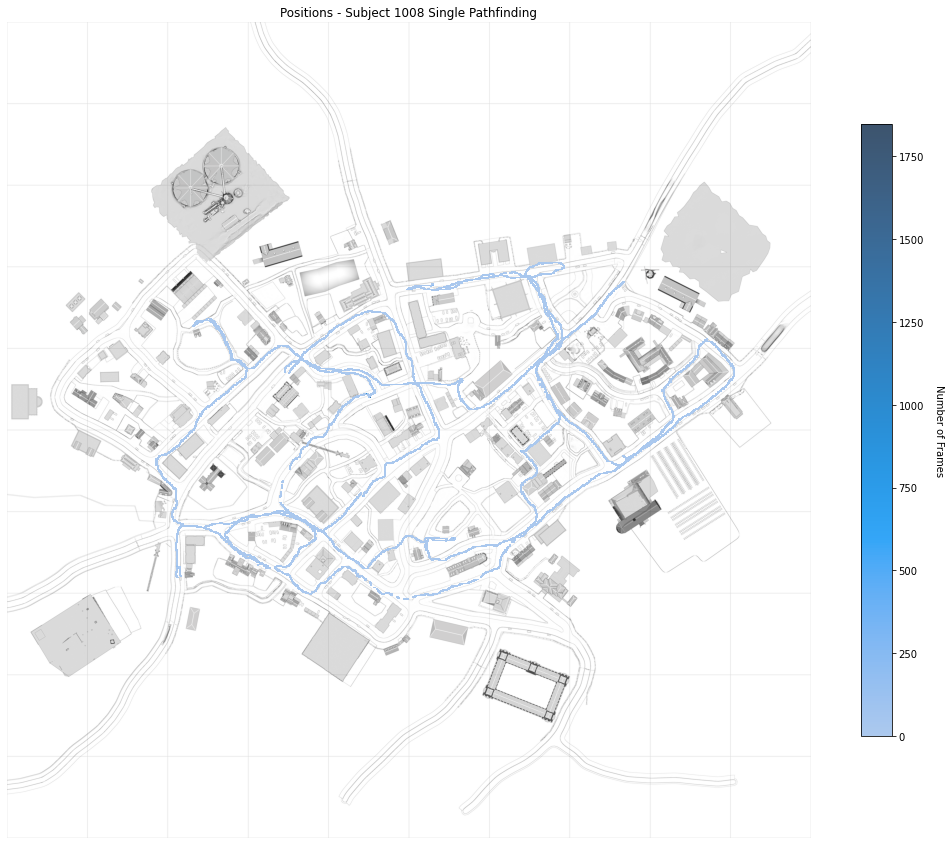

In [24]:
# Hit points on colliders

fig, ax = plt.subplots(figsize=(18, 15))

map_bins = 512 #2048
histplot = sns.histplot(single_pathfinding_df,x="transformed_hmdposition_x",y="transformed_hmdposition_y",bins=map_bins,discrete=(False,False),log_scale=(False,False), cbar=True, cbar_kws=dict(shrink=0.75), alpha = 1, zorder=2, ax=ax)
ax.collections[0].colorbar.set_label("Number of Frames",rotation=270,labelpad=20) # fontsize, labelpad


ax.set_frame_on(False)
plt.xlim(0, 4096)
plt.ylim(0, 4096)
plt.title("Positions - Subject 1008 Single Pathfinding")
plt.axis('off')


# add background map 
histplot.imshow(white_bg_img,
         aspect=ax.get_aspect(),
         extent= ax.get_xlim() + ax.get_ylim(),
         zorder=1)

plt.show() # add




### Trying out

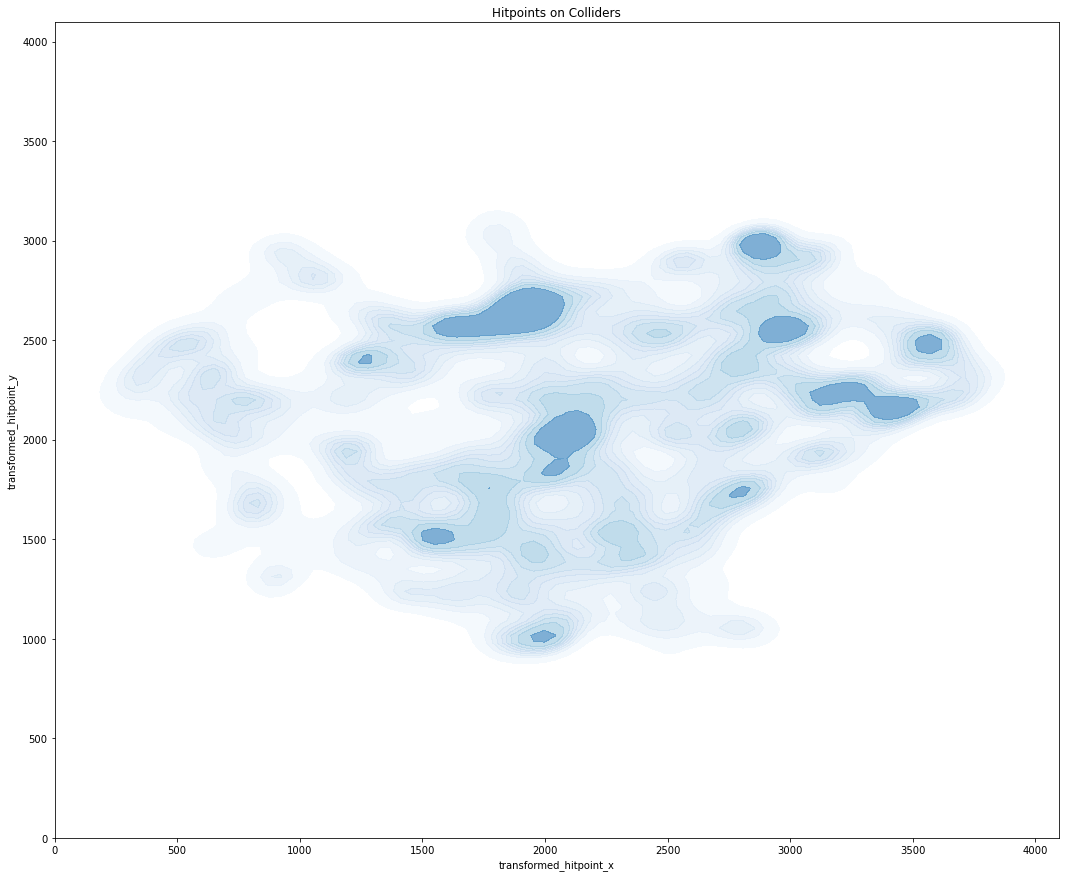

In [49]:

fig, ax = plt.subplots(figsize=(18, 15))

map_bins = 2048
kdeplot = sns.kdeplot(data=only_first_ordinal,x="transformed_hitpoint_x",y="transformed_hitpoint_y", bw= 0.1, cmap="Blues", shade=True, shade_lowest=False, alpha = 0.6, zorder=2, ax=ax)


# plot your KDE
#ax.set_frame_on(False)
plt.xlim(0, 4096)
plt.ylim(0, 4096)
plt.title("Hitpoints on Colliders")
#plt.axis('off')
#plt.show()

# update
histplot.imshow(white_bg_img,
         aspect=ax.get_aspect(),
         extent= ax.get_xlim() + ax.get_ylim(),
         zorder=1)

plt.show() # add





In [67]:
# sns.heatmap(...)
# np.histogram2d(...)